# Семинар по обработке текстов

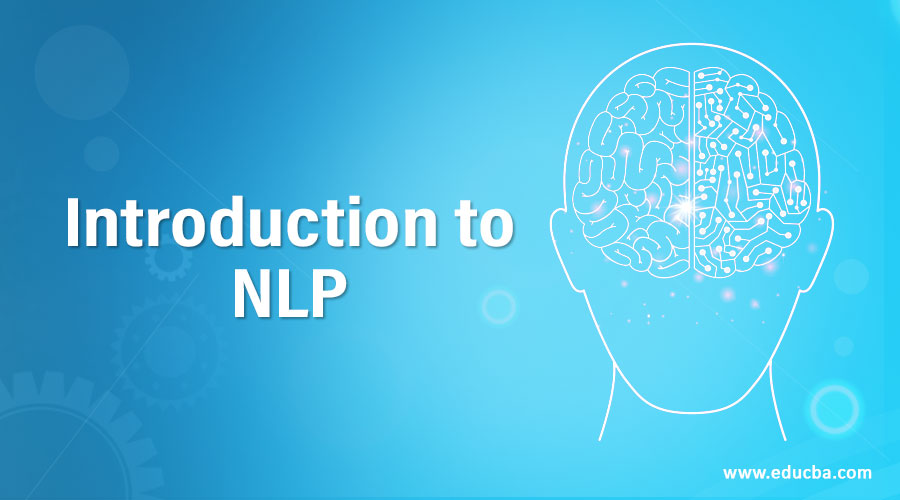

### План:

- предобработка текстов (токенизация, лемматизация, стемминг)

- bag of words и tf-idf для векторизации текстов

- облако слов для визуализации

- простая аналитика текстов

- обучение моделей на текстах

### Классические методы для работы с текстами:

- токенизация

- лемматизация / стемминг

- удаление стоп-слов и пунктуации

- векторное представление текстов (bag of words и TF-IDF)

_Что почитать:_

- Jurafsky, Martin: Speech and Language Processing (2nd or 3rd Edition)

## Токенизация

Токенизировать — значит, поделить текст на слова, или *токены*.

Самый наивный способ токенизировать текст — разделить с помощью `split`. Но `split` упускает очень много всего, например, не отделяет пунктуацию от слов. Кроме этого, есть ещё много менее тривиальных проблем. Поэтому лучше использовать готовые токенизаторы.

In [ ]:
#!pip install nltk

In [1]:
from nltk.tokenize import word_tokenize
import numpy as np
import pandas as pd

In [2]:
example = 'Но не каждый хочет что-то исправлять:('

In [3]:
# c помощью split()
example.split()

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять:(']

In [4]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Борис\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
# c помощью токенизатора
word_tokenize(example)

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять', ':', '(']

В nltk вообще есть довольно много токенизаторов:

In [6]:
from nltk import tokenize
dir(tokenize)[:16]

['BlanklineTokenizer',
 'LegalitySyllableTokenizer',
 'LineTokenizer',
 'MWETokenizer',
 'NLTKWordTokenizer',
 'PunktSentenceTokenizer',
 'RegexpTokenizer',
 'ReppTokenizer',
 'SExprTokenizer',
 'SpaceTokenizer',
 'StanfordSegmenter',
 'SyllableTokenizer',
 'TabTokenizer',
 'TextTilingTokenizer',
 'ToktokTokenizer',
 'TreebankWordDetokenizer']

Можно получить индексы начала и конца каждого токена:

In [7]:
wh_tok = tokenize.WhitespaceTokenizer()
list(wh_tok.span_tokenize(example))

[(0, 2), (3, 5), (6, 12), (13, 18), (19, 25), (26, 38)]

Некторые токенизаторы ведут себя специфично:

In [8]:
tokenize.TreebankWordTokenizer().tokenize("don't stop me")

['do', "n't", 'stop', 'me']

Для некоторых задач это может быть полезно.

А некоторые предназначены вообще не для текста на естественном языке:

In [9]:
tokenize.SExprTokenizer().tokenize("(a (b c)) d e (f)")

['(a (b c))', 'd', 'e', '(f)']

Есть токенизатор, который может быть полезен для работы с твитами или сообщениями из соц. сетей.
Он сохранит смайлики, хештеги и т.п.

In [ ]:
from nltk.tokenize import TweetTokenizer

tw = TweetTokenizer()
tw.tokenize(example)

['Но', 'не', 'каждый', 'хочет', 'что-то', 'исправлять', ':(']

_Что почитать:_

- http://mlexplained.com/2019/11/06/a-deep-dive-into-the-wonderful-world-of-preprocessing-in-nlp/
- https://blog.floydhub.com/tokenization-nlp/

## Стоп-слова и пунктуация

*Стоп-слова* — это слова, которые часто встречаются практически в любом тексте и ничего интересного не говорят о конретном документе, то есть играют роль шума. Поэтому их принято убирать. По той же причине убирают и пунктуацию.

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('russian'))

['и', 'в', 'во', 'не', 'что', 'он', 'на', 'я', 'с', 'со', 'как', 'а', 'то', 'все', 'она', 'так', 'его', 'но', 'да', 'ты', 'к', 'у', 'же', 'вы', 'за', 'бы', 'по', 'только', 'ее', 'мне', 'было', 'вот', 'от', 'меня', 'еще', 'нет', 'о', 'из', 'ему', 'теперь', 'когда', 'даже', 'ну', 'вдруг', 'ли', 'если', 'уже', 'или', 'ни', 'быть', 'был', 'него', 'до', 'вас', 'нибудь', 'опять', 'уж', 'вам', 'ведь', 'там', 'потом', 'себя', 'ничего', 'ей', 'может', 'они', 'тут', 'где', 'есть', 'надо', 'ней', 'для', 'мы', 'тебя', 'их', 'чем', 'была', 'сам', 'чтоб', 'без', 'будто', 'чего', 'раз', 'тоже', 'себе', 'под', 'будет', 'ж', 'тогда', 'кто', 'этот', 'того', 'потому', 'этого', 'какой', 'совсем', 'ним', 'здесь', 'этом', 'один', 'почти', 'мой', 'тем', 'чтобы', 'нее', 'сейчас', 'были', 'куда', 'зачем', 'всех', 'никогда', 'можно', 'при', 'наконец', 'два', 'об', 'другой', 'хоть', 'после', 'над', 'больше', 'тот', 'через', 'эти', 'нас', 'про', 'всего', 'них', 'какая', 'много', 'разве', 'три', 'эту', 'моя', 'впр

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
from string import punctuation
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
noise = stopwords.words('russian') + list(punctuation)

## Лемматизация

[**Лемматизация**](https://en.wikipedia.org/wiki/Lemmatisation) — процесс приведения слова к его нормальной форме (**лемме**):
- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве.


Например, токены «пью», «пил», «пьет» перейдут в «пить». Почему это хорошо?
* Во-первых, мы хотим рассматривать как отдельный признак каждое *слово*, а не каждую его отдельную форму.
* Во-вторых, некоторые стоп-слова стоят только в начальной форме, и без лемматизации выкидываем мы только её.

Для русского есть два хороших лемматизатора: `mystem` и `pymorphy`.

### [Mystem](https://tech.yandex.ru/mystem/)
Как с ним работать:
* можно скачать mystem и запускать [из терминала с разными параметрами](https://tech.yandex.ru/mystem/doc/)
* [pymystem3](https://pythonhosted.org/pymystem3/pymystem3.html) - обертка для питона, работает медленнее, но это удобно

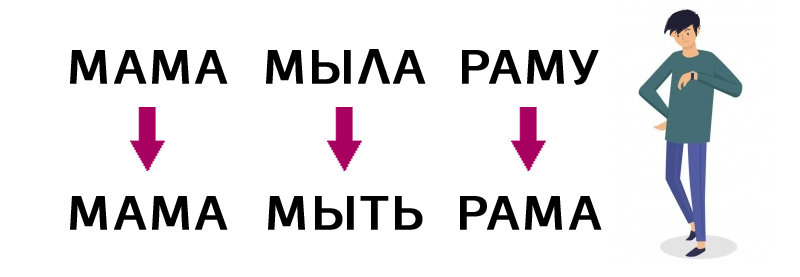

In [ ]:
!pip install pymystem3

In [11]:
from pymystem3 import Mystem
import pymystem3
mystem_analyzer = Mystem()

Installing mystem to C:\Users\Борис/.local/bin\mystem.exe from http://download.cdn.yandex.net/mystem/mystem-3.1-win-64bit.zip


Мы инициализировали Mystem c дефолтными параметрами. А вообще параметры есть такие:
* mystem_bin — путь к `mystem`, если их несколько
* grammar_info — нужна ли грамматическая информация или только леммы (по умолчанию нужна)
* disambiguation — нужно ли снятие [омонимии](https://ru.wikipedia.org/wiki/%D0%9E%D0%BC%D0%BE%D0%BD%D0%B8%D0%BC%D1%8B) - дизамбигуация (по умолчанию нужна)
* entire_input — нужно ли сохранять в выводе все (пробелы, например), или можно выкинуть (по умолчанию оставляется все)

Методы Mystem принимают строку, токенизатор вшит внутри. Можно, конечно, и пословно анализировать, но тогда он не сможет учитывать контекст.

Можно просто лемматизировать текст:

In [12]:
print(mystem_analyzer.lemmatize(example))

['но', ' ', 'не', ' ', 'каждый', ' ', 'хотеть', ' ', 'что-то', ' ', 'исправлять', ':(\n']


### [Pymorphy](http://pymorphy2.readthedocs.io/en/latest/)
Это модуль на питоне, довольно быстрый и с кучей функций.

In [ ]:
!pip install pymorphy2
!pip install pymorphy2-dicts
!pip install DAWG-Python

In [10]:
from pymorphy2 import MorphAnalyzer
pymorphy2_analyzer = MorphAnalyzer()

pymorphy2 работает с отдельными словами. Если дать ему на вход предложение — он его просто не лемматизирует, т.к. не понимает.

Метод MorphAnalyzer.parse() принимает слово  и возвращает все возможные его разборы.

У каждого разбора есть тег.
Тег - это набор граммем, характеризующих данное слово. Например, тег 'VERB,perf,intr plur,past,indc' означает, что слово - глагол (VERB) совершенного вида (perf), непереходный (intr), множественного числа (plur), прошедшего времени (past), изъявительного наклонения (indc).


In [ ]:
ana = pymorphy2_analyzer.parse('хочет')
ana

[Parse(word='хочет', tag=OpencorporaTag('VERB,impf,tran sing,3per,pres,indc'), normal_form='хотеть', score=1.0, methods_stack=((DictionaryAnalyzer(), 'хочет', 3136, 5),))]

In [ ]:
ana[0].normal_form

'хотеть'

### mystem vs. pymorphy

1) *Надеемся, что вы пользуетесь линуксом или маком* — mystem работает невероятно медленно под windows на больших текстах

2) *Снятие омонимии*. Mystem умеет снимать омонимию по контексту (хотя не всегда преуспевает), pymorphy2 берет на вход одно слово и соответственно вообще не умеет дизамбигуировать по контексту.

In [ ]:
homonym1 = 'За время обучения я прослушал больше сорока курсов.'
homonym2 = 'Сорока своровала блестящее украшение со стола.'

# корректно определелил части речи
# NUM - числительное
# S — существительное
print(mystem_analyzer.analyze(homonym1)[-5])
print(mystem_analyzer.analyze(homonym2)[0])

{'analysis': [{'lex': 'сорок', 'wt': 0.8710292664, 'gr': 'NUM=(пр|дат|род|твор)'}], 'text': 'сорока'}
{'analysis': [{'lex': 'сорока', 'wt': 0.1210970041, 'gr': 'S,жен,од=им,ед'}], 'text': 'Сорока'}


## Стемминг

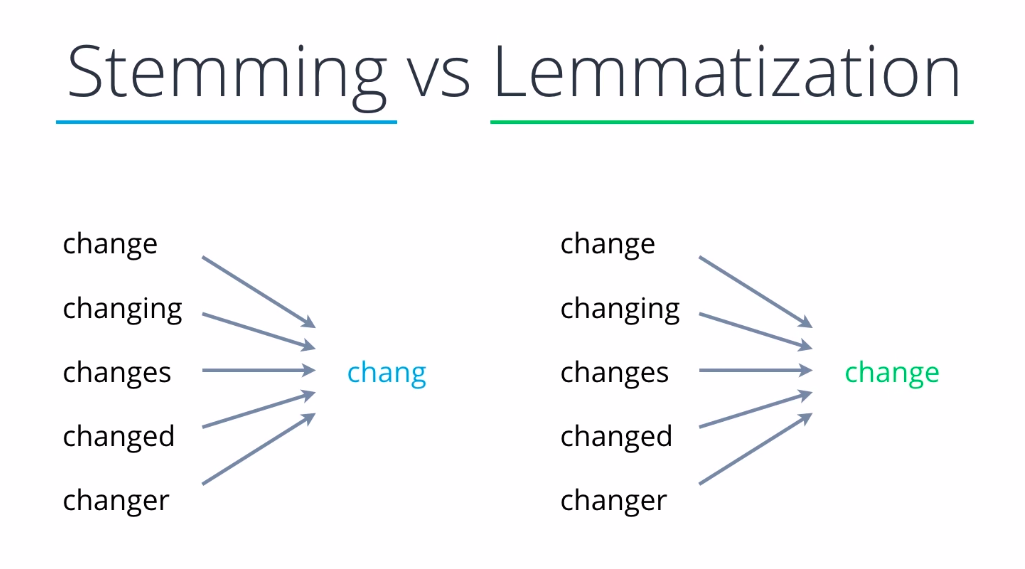

В отличие от лемматизации, при применении стемминга у всех слов отбрасываются аффиксы (окончания и суффиксы), что необязательно приводит слова к формам, существующим в рассматриваемом языке.

[**Snowball**](http://snowball.tartarus.org/) – фрэймворк для написания алгоритмов стемминга. Алгоритмы стемминга отличаются для разных языков и используют знания о конкретном языке – списки окончаний для разных чистей речи, разных склонений и т.д.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

In [ ]:
tokenized_example = word_tokenize(example)

In [ ]:
stemmer = SnowballStemmer('russian')
stemmed_example = [stemmer.stem(w) for w in tokenized_example]
print(' '.join(stemmed_example))

но не кажд хочет что-т исправля : (


Для английского получится что-то такое.

In [ ]:
text = "In my younger and more vulnerable years my father gave me some advice that I've been turning over in my mind ever since.\n\"Whenever you feel like criticizing any one,\" he told me, \"just remember that all the people in this world haven't had the advantages that you've had.\""
print(text)
text_tokenized = [w for w in word_tokenize(text) if w.isalpha()]
print('==========')
print(text_tokenized)

In my younger and more vulnerable years my father gave me some advice that I've been turning over in my mind ever since.
"Whenever you feel like criticizing any one," he told me, "just remember that all the people in this world haven't had the advantages that you've had."
['In', 'my', 'younger', 'and', 'more', 'vulnerable', 'years', 'my', 'father', 'gave', 'me', 'some', 'advice', 'that', 'I', 'been', 'turning', 'over', 'in', 'my', 'mind', 'ever', 'since', 'Whenever', 'you', 'feel', 'like', 'criticizing', 'any', 'one', 'he', 'told', 'me', 'just', 'remember', 'that', 'all', 'the', 'people', 'in', 'this', 'world', 'have', 'had', 'the', 'advantages', 'that', 'you', 'had']


In [ ]:
stemmer = SnowballStemmer('english')
text_stemmed = [stemmer.stem(w) for w in text_tokenized]
print(' '.join(text_stemmed))

in my younger and more vulner year my father gave me some advic that i been turn over in my mind ever sinc whenev you feel like critic ani one he told me just rememb that all the peopl in this world have had the advantag that you had


_Что почитать:_

- https://en.wikipedia.org/wiki/Stemming
- https://en.wikipedia.org/wiki/Lemmatisation
- https://www.datacamp.com/community/tutorials/stemming-lemmatization-python

## Bag-of-words и TF-IDF

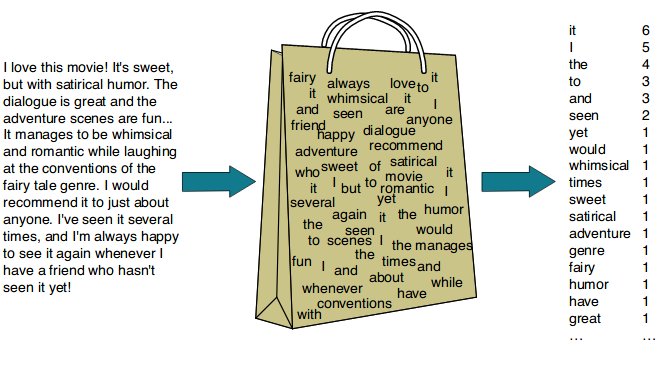

Но как же все-таки работать с текстами, используя стандартные методы машинного обучения? Нужна выборка!


### Bag-of-words

Самый очевидный способ формирования признакового описания текстов — векторизация. Пусть у нас имеется коллекция текстов $D = \{d_i\}_{i=1}^l$ и словарь всех слов, встречающихся в выборке $V = \{v_j\}_{j=1}^d.$ В этом случае некоторый текст $d_i$ описывается вектором $(x_{ij})_{j=1}^d,$ где
$$x_{ij} = \sum_{v \in d_i} [v = v_j].$$

Таким образом, текст $d_i$ описывается вектором количества вхождений каждого слова из словаря в данный текст.

In [ ]:
texts = ['I like my cat.', 'My cat is the most perfect cat.', 'is this cat or is this bread?']

In [ ]:
texts_tokenized = [' '.join([w for w in word_tokenize(t) if w.isalpha()]) for t in texts]
texts_tokenized

['I like my cat',
 'My cat is the most perfect cat',
 'is this cat or is this bread']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()
X = cnt_vec.fit_transform(texts_tokenized)

In [ ]:
cnt_vec.get_feature_names_out()

array(['bread', 'cat', 'is', 'like', 'most', 'my', 'or', 'perfect', 'the',
       'this'], dtype=object)

In [ ]:
X

<3x10 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [ ]:
X.toarray()

array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [0, 2, 1, 0, 1, 1, 0, 1, 1, 0],
       [1, 1, 2, 0, 0, 0, 1, 0, 0, 2]])

In [ ]:
pd.DataFrame(X.toarray(), columns=cnt_vec.get_feature_names_out())

,bread,cat,is,like,most,my,or,perfect,the,this
0,0,1,0,1,0,1,0,0,0,0
1,0,2,1,0,1,1,0,1,1,0
2,1,1,2,0,0,0,1,0,0,2


### TF-IDF

Заметим, что если слово часто встречается в одном тексте, но почти не встречается в других, то оно получает для данного текста большой вес, ровно так же, как и слова, которые часто встречаются в каждом тексте. Для того, чтобы разделять эти такие слова, можно использовать статистическую меру TF-IDF, характеризующую важность слова для конкретного текста. Для каждого слова из текста $d$ рассчитаем относительную частоту встречаемости в нем (Term Frequency):
$$
\text{TF}(t, d) = \frac{C(t | d)}{\sum\limits_{k \in d}C(k | d)},
$$
где $C(t | d)$ - число вхождений слова $t$ в текст $d$.

Также для каждого слова из текста $d$ рассчитаем обратную частоту встречаемости в корпусе текстов $D$ (Inverse Document Frequency):
$$
\text{IDF}(t, D) = \log\left(\frac{|D|}{|\{d_i \in D \mid t \in d_i\}|}\right)
$$
Логарифмирование здесь проводится с целью уменьшить масштаб весов, ибо зачастую в корпусах присутствует очень много текстов.

В итоге каждому слову $t$ из текста $d$ теперь можно присвоить вес
$$
\text{TF-IDF}(t, d, D) = \text{TF}(t, d) \times \text{IDF}(t, D)
$$
Интерпретировать формулу выше несложно: действительно, чем чаще данное слово встречается в данном тексте и чем реже в остальных, тем важнее оно для этого текста.

Отметим, что в качестве TF и IDF можно использовать другие [определения](https://en.wikipedia.org/wiki/Tf%E2%80%93idf#Definition).

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
X = tfidf_vec.fit_transform(texts_tokenized)

NameError: name 'texts_tokenized' is not defined

In [ ]:
tfidf_vec.get_feature_names_out()

array(['bread', 'cat', 'is', 'like', 'most', 'my', 'or', 'perfect', 'the',
       'this'], dtype=object)

In [ ]:
X

<3x10 sparse matrix of type '<class 'numpy.float64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [ ]:
X.toarray()

array([[0.        , 0.42544054, 0.        , 0.72033345, 0.        ,
        0.54783215, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.50130994, 0.32276391, 0.        , 0.42439575,
        0.32276391, 0.        , 0.42439575, 0.42439575, 0.        ],
       [0.33976626, 0.20067143, 0.516802  , 0.        , 0.        ,
        0.        , 0.33976626, 0.        , 0.        , 0.67953252]])

In [ ]:
pd.DataFrame(X.toarray(), columns=tfidf_vec.get_feature_names_out())

,bread,cat,is,like,most,my,or,perfect,the,this
0,0.000000,0.425441,0.000000,0.720333,0.000000,0.547832,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.501310,0.322764,0.000000,0.424396,0.322764,0.000000,0.424396,0.424396,0.000000
2,0.339766,0.200671,0.516802,0.000000,0.000000,0.000000,0.339766,0.000000,0.000000,0.679533


**Вопросик:** Что изменилось по сравнению с использованием метода `CountVectorizer`?

_Что почитать:_

- https://en.wikipedia.org/wiki/Tf%E2%80%93idf
- https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf

## N-граммы


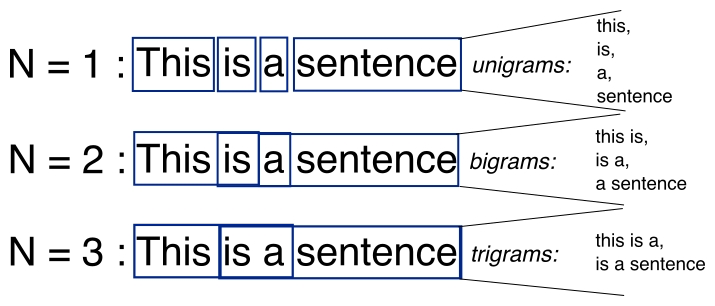

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

Что такое n-граммы:

In [ ]:
from nltk import ngrams

In [ ]:
sent = 'Если б мне платили каждый раз'.split()
list(ngrams(sent, 1)) # униграммы

[('Если',), ('б',), ('мне',), ('платили',), ('каждый',), ('раз',)]

In [ ]:
list(ngrams(sent, 2)) # биграммы

[('Если', 'б'),
 ('б', 'мне'),
 ('мне', 'платили'),
 ('платили', 'каждый'),
 ('каждый', 'раз')]

In [ ]:
list(ngrams(sent, 3)) # триграммы

[('Если', 'б', 'мне'),
 ('б', 'мне', 'платили'),
 ('мне', 'платили', 'каждый'),
 ('платили', 'каждый', 'раз')]

In [ ]:
list(ngrams(sent, 5)) # ... пентаграммы?

[('Если', 'б', 'мне', 'платили', 'каждый'),
 ('б', 'мне', 'платили', 'каждый', 'раз')]

## Задача: классификация твитов по тональности

У нас есть датасет из твитов, про каждый указано, как он эмоционально окрашен: положительно или отрицательно. Задача: предсказывать эмоциональную окраску.

Классификацию по тональности используют, например, в рекомендательных системах, чтобы понять, понравилось ли людям кафе, кино, etc.

Скачиваем куски датасета ([источник](http://study.mokoron.com/)): [положительные](https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv?dl=0), [отрицательные](https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv).

In [ ]:
# если у вас линукс / мак / collab или ещё какая-то среда, в которой работает wget, можно так:
!wget https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
!wget https://www.dropbox.com/s/r6u59ljhhjdg6j0/negative.csv

--2024-03-31 12:41:20--  https://www.dropbox.com/s/fnpq3z4bcnoktiv/positive.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/fnpq3z4bcnoktiv/positive.csv [following]
--2024-03-31 12:41:20--  https://www.dropbox.com/s/raw/fnpq3z4bcnoktiv/positive.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc26b127ed6dc5db5fadf70d1a50.dl.dropboxusercontent.com/cd/0/inline/CQJTFqwbB2F44AzOi1GN5DPNETMwo95EDkIzP7Ln41Or7AbZ48iQmQ8dLTshn47SpOiEaW1N2nvZdfTkPYNdpsA5BohAGbnMl3jcRWd1GAleMXSyqkVi19OrT3CYTTYtatQ/file# [following]
--2024-03-31 12:41:21--  https://uc26b127ed6dc5db5fadf70d1a50.dl.dropboxusercontent.com/cd/0/inline/CQJTFqwbB2F44AzOi1GN5DPNETMwo95EDkIzP7Ln41Or7AbZ48iQmQ8dLTshn47SpOiEaW1N2nvZdfTkPYNdpsA5BohAGbnMl3jcRWd1GAleMXSyqkVi19OrT3C

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
# считываем данные и заполняем общий датасет
positive = pd.read_csv('positive.csv', sep=';', usecols=[3], names=['text'])
positive['label'] = 'positive'
negative = pd.read_csv('negative.csv', sep=';', usecols=[3], names=['text'])
negative['label'] = 'negative'
df = positive.append(negative)

<ipython-input-3-a17744a3eeee>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = positive.append(negative)


In [ ]:
df.tail()

,text,label
111918,Но не каждый хочет что то исправлять:( http://...,negative
111919,скучаю так :-( только @taaannyaaa вправляет мо...,negative
111920,"Вот и в школу, в говно это идти уже надо(",negative
111921,"RT @_Them__: @LisaBeroud Тауриэль, не грусти :...",negative
111922,Такси везет меня на работу. Раздумываю приплат...,negative


In [ ]:
df.shape

(226834, 2)

# Облако слов

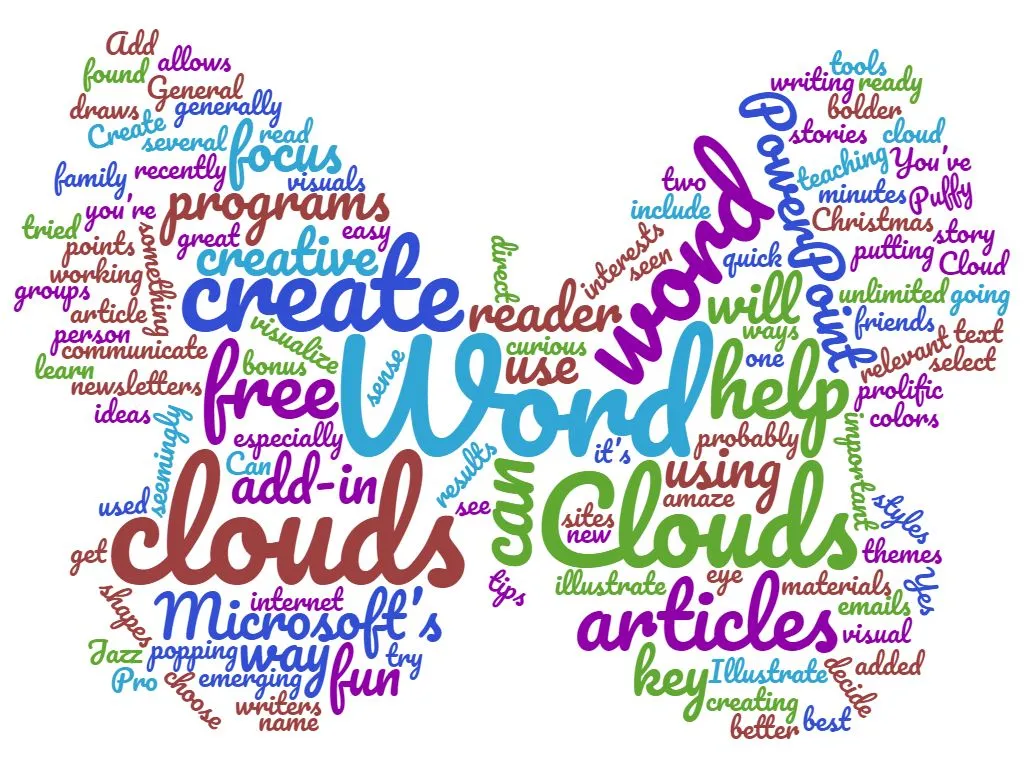

In [ ]:
!pip install wordcloud

In [ ]:
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

Построим облако слов по всем словам

In [ ]:
merged_text = ' '.join(df['text'].tolist())

wc = WordCloud().generate(merged_text)

plt.imshow(wc)

In [ ]:
from collections import Counter
import seaborn as sns

counted = Counter(merged_text.split())
word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

word_freq.head()

Очистим текст:

- оставим только буквы

- понизим регистр

- удалим стоп-слова

In [ ]:
import re
import nltk
nltk.download('stopwords')

# 1. Очистка текста от всех символов, кроме букв
clean_text = re.sub(r'[^а-яёА-ЯЁ]', ' ', merged_text)

# 2. Приведение текста к нижнему регистру
lower_text = clean_text.lower()

# 3. Удаление стоп-слов
stop_words = set(stopwords.words('russian'))
words = lower_text.split()
filtered_words = [word for word in words if word not in stop_words]
filtered_text = ' '.join(filtered_words)

# 4. Построение облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
counted = Counter(filtered_words)
word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

word_freq.head(10)

Добавим лемматизацию

In [ ]:
# 1. Очистка текста от всех символов, кроме букв
clean_text = re.sub(r'[^а-яёА-ЯЁ]', ' ', merged_text[:1_000_000])

# 2. Приведение текста к нижнему регистру
lower_text = clean_text.lower()

# 3. Удаление стоп-слов
stop_words = set(stopwords.words('russian'))
words = lower_text.split()
filtered_words = [word for word in words if word not in stop_words]
filtered_text = ' '.join(filtered_words)

# 4. Лемматизация текста
mystem = Mystem()
lemmatized_words = mystem.lemmatize(filtered_text)
# Удаляем лишние пробелы и символ переноса строки, оставшиеся после лемматизации
lemmatized_text = ''.join(lemmatized_words).replace('\n', ' ')

# 5. Построение облака слов
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text)

# Отображение облака слов
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
counted = Counter(lemmatized_words)
word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)

word_freq = word_freq.iloc[1:]

word_freq.head(10)

In [ ]:
# create subplot of the different data frames
sns.barplot(x='frequency',y='word',data=word_freq.head(30))

# Простая аналитика текстов

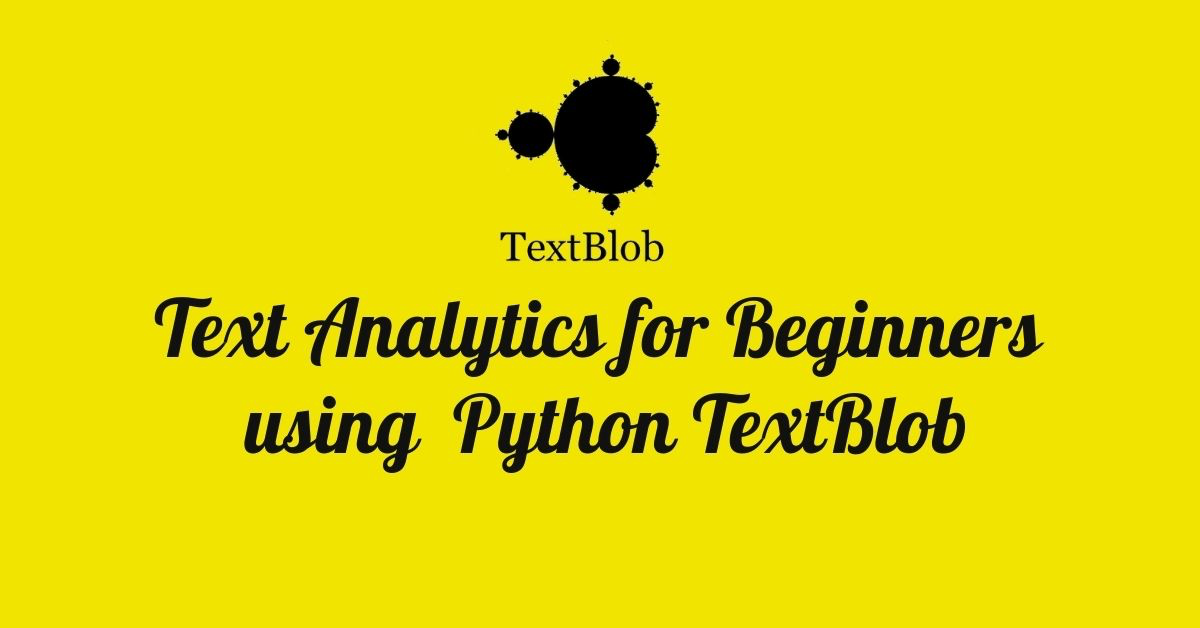

Есть различные библиотеки для работы с текстами. Одна из самых простых - `TextBlob`. В ней есть простые методы для базовой аналитики на текстах.

In [ ]:
df['text']

In [ ]:
from textblob import TextBlob

df['Polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['text'].apply(lambda x: len(str(x)))

Посмотрим на:

1) самые позитивные предложения

2) нейтральные предложения

In [ ]:
cl = df.loc[df.Polarity == 1, ['text']].sample(5).values
for c in cl:
    print(c[0])

In [ ]:
cl = df.loc[df.Polarity == 0, ['text']].sample(5).values
for c in cl:
    print(c[0])

Вычислим:

- длину текстов (в символах)

- количество слов в текстах

In [ ]:
features = ['Polarity', 'review_len', 'word_count']
titles = ['Polarity Distribution', 'Review length Distribution', 'Word Count Distribution']
colors = ['#9966ff', '#00ff00', '#ff6600']

for feature, title, color in zip(features, titles, colors):
    sns.histplot(x=df[feature], bins=50, color=color)
    plt.title(title, size=15)
    plt.xlabel(feature)
    plt.show()

# Обучение ML-моделей на текстах

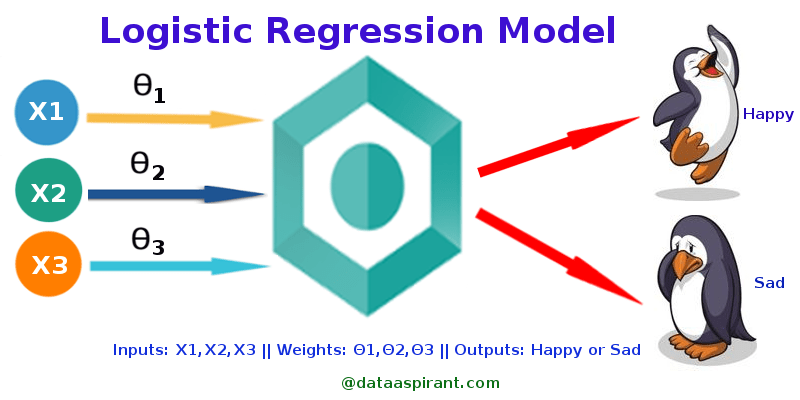

In [ ]:
from sklearn.linear_model import LogisticRegression # можно заменить на любимый классификатор

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.text, df.label, random_state=13)

Как уже обсуждали, самый простой способ извлечь признаки из текстовых данных — векторизаторы: `CountVectorizer` и `TfidfVectorizer`

Объект `CountVectorizer` делает простую вещь:
* строит для каждого документа (каждой пришедшей ему строки) вектор размерности `n`, где `n` -- количество слов или n-грам во всём корпусе
* заполняет каждый i-тый элемент количеством вхождений слова в данный документ

In [ ]:
vec = CountVectorizer(ngram_range=(1, 1))
bow = vec.fit_transform(x_train) # bow — bag of words (мешок слов)
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

ngram_range отвечает за то, какие n-граммы мы используем в качестве фичей:<br/>
ngram_range=(1, 1) — униграммы<br/>
ngram_range=(3, 3) — триграммы<br/>
ngram_range=(1, 3) — униграммы, биграммы и триграммы.

В `vec.vocabulary_` лежит словарь: мэппинг слов к их индексам:

In [ ]:
list(vec.vocabulary_.items())[:10]

[('690064', 4548),
 ('давай', 122764),
 ('ходить', 233469),
 ('со', 212154),
 ('мной', 159037),
 ('будешь', 108431),
 ('отпрашиваться', 176489),
 ('на', 161516),
 ('два', 123438),
 ('часа', 235947)]

In [ ]:
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.76      0.77      0.76     27957
    positive       0.77      0.76      0.77     28752

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



Попробуем сделать то же самое для триграмм.

In [ ]:
vec = CountVectorizer(ngram_range=(1, 2))
bow = vec.fit_transform(x_train)
bow_test = vec.transform(x_test)


scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [ ]:
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred_thrgramm = clf.predict(bow_test)
print(classification_report(y_test, pred_thrgramm))

              precision    recall  f1-score   support

    negative       0.77      0.78      0.78     27957
    positive       0.78      0.78      0.78     28752

    accuracy                           0.78     56709
   macro avg       0.78      0.78      0.78     56709
weighted avg       0.78      0.78      0.78     56709



В нашем случае стало хуже :)

А теперь для TF-IDF

In [ ]:
vec = TfidfVectorizer(ngram_range=(1, 1))
vec_train = vec.fit_transform(x_train)
vec_test = vec.transform(x_test)


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

In [ ]:
clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(vec_train, y_train)
pred_tfidf = clf.predict(vec_test)
print(classification_report(y_test, pred_tfidf))

              precision    recall  f1-score   support

    negative       0.77      0.75      0.76     27957
    positive       0.76      0.78      0.77     28752

    accuracy                           0.76     56709
   macro avg       0.76      0.76      0.76     56709
weighted avg       0.76      0.76      0.76     56709



## О важности эксплоративного анализа

Но иногда пунктуация бывает и не шумом — главное отталкиваться от задачи. Что будет если вообще не убирать пунктуацию?

In [ ]:
import nltk
nltk.download('punkt')

vec = CountVectorizer(ngram_range=(1, 1), tokenizer=word_tokenize)
bow = vec.fit_transform(x_train)
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.95      0.97      0.96     27957
    positive       0.97      0.95      0.96     28752

    accuracy                           0.96     56709
   macro avg       0.96      0.96      0.96     56709
weighted avg       0.96      0.96      0.96     56709



Стоило оставить пунктуацию — и внезапно все метрики устремились к 1. Как это получилось? Среди неё были очень значимые токены (как вы думаете, какие?). Найдите признаки с самыми большими коэффициентами:

In [ ]:
np.argmax(clf.coef_)

8

In [ ]:
vec.get_feature_names_out()[8]

')'

Посмотрим, как один из супер-значительных токенов справится с классификацией безо всякого машинного обучения:

In [ ]:
cool_token = ')'
pred = ['positive' if cool_token in tweet else 'negative' for tweet in x_test]
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

    negative       0.85      1.00      0.92     27957
    positive       1.00      0.83      0.91     28752

    accuracy                           0.91     56709
   macro avg       0.93      0.92      0.91     56709
weighted avg       0.93      0.91      0.91     56709



In [ ]:
cool_token = ')'
tweets_with_cool_token = [tweet for tweet in x_train if cool_token in tweet]
np.random.seed(42)
for tweet in np.random.choice(tweets_with_cool_token, size=10, replace=False):
    print(tweet)

“@Fashionbar_uz: Ladies Monday . Каждый понедельник для всех девушек кальяны от заведения. #fashionbar http://t.co/ZlvxOcZPR4” zaviduyu))
Гримерка-лук))) #evabristol #performance #gig #vocaldiva #гастроли #гитис #театр http://t.co/S60OvyyTS6
RT @alivfedorov: http://t.co/DvYLJaPHxR Девушки это самые хитрые создания! так что даже не пытайся их обмануть!:)
@pavelsheremet @ukrpravda_news @varlamov хотя исторически правильно желто-синий:)
Понятия не имею чем меня привлекла эта картинка!)))http://t.co/twqP8zyh1A
@Sveta12126 ну или пусть Лиама пришлет ко мне) своего младшенького. Как сказала Кэтрин: "Это нормально - любить двоих" ахах
Вышел в свет новый каталог запасных частей и деталей ТМК! Звоните - подарим :)
@u_alekseeva_17 видужуй:3
Я там тепер буду кожну середу)
29-й выпуск Дроидкаста будет не против ваших плюсов на Хабре   ;)
@nemoniga а я вот знаю :) нам на политической географии рассказывал душечка Гурин


## Символьные n-граммы

Теперь в качестве признаков используем, например, униграммы символов:

In [ ]:
vec = CountVectorizer(ngram_range=(1, 1), analyzer='char')
bow = vec.fit_transform(x_train)
bow_test = vec.transform(x_test)

scaler = MaxAbsScaler()
bow = scaler.fit_transform(bow)
bow_test = scaler.transform(bow_test)

In [ ]:
vec.get_feature_names_out()

array(['\n', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+',
       ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       '9', ':', ';', '=', '?', '@', '[', '\\', ']', '^', '_', '`', 'a',
       'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n',
       'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{',
       '|', '}', '~', '\xa0', '¡', '£', '¤', '¥', '¦', '§', '¨', '©', '«',
       '¬', '\xad', '®', '°', '±', '³', '´', 'º', '»', '¿', '×', 'ß', 'à',
       'á', 'ä', 'ç', 'é', 'ë', 'í', 'ö', 'ú', 'ü', 'č', 'ě', 'ı', 'ļ',
       'š', 'ƪ', 'ɑ', 'ʃ', 'ʖ', 'ʘ', 'ˇ', '˚', '́', '̆', '̶', '͡', 'ά',
       'ή', 'ί', 'α', 'ε', 'θ', 'ι', 'κ', 'μ', 'ν', 'ο', 'ρ', 'ς', 'σ',
       'τ', 'υ', 'φ', 'χ', 'ω', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з',
       'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф',
       'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', 'є',
       'і', 'ї', 'ћ', 'ў', 'ғ', 'ҕ', 'қ', 'ң', 'ү', 'ұ',

In [ ]:
clf = LogisticRegression(max_iter=200, random_state=42)
clf.fit(bow, y_train)
pred = clf.predict(bow_test)
print(classification_report(y_test, pred))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


              precision    recall  f1-score   support

    negative       0.99      0.97      0.98     27957
    positive       0.98      0.99      0.98     28752

    accuracy                           0.98     56709
   macro avg       0.98      0.98      0.98     56709
weighted avg       0.98      0.98      0.98     56709



В общем-то, теперь уже понятно, почему на этих данных здесь 1. Так или иначе, на символах классифицировать тоже можно: для некоторых задач (например, для определения языка) признаки-символьные n-граммы могут внести серьезный вклад в качество модели.

Ещё одна замечательная особенность признаков-символов: токенизация и лемматизация не нужна, можно использовать такой подход для языков, у которых нет готовых анализаторов.

_Что почитать:_

- https://web.stanford.edu/~jurafsky/slp3/3.pdf
- https://books.google.com/ngrams